RMSE (Analysis vs Observations): 3.2255139663701935
Bias (Analysis vs Observations): -1.4201059031863756
RMSE (Analysis vs Model Output): 3.4001506858904915
Bias (Analysis vs Model Output): -1.2201059031863757


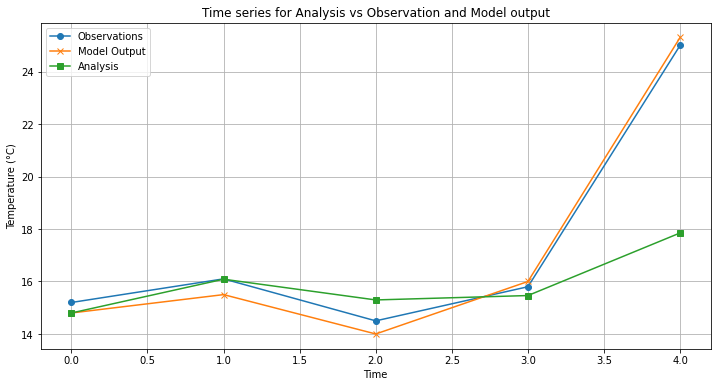

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sample observational data (in degrees Celsius)
observations = np.array([15.2, 16.1, 14.5, 15.8, 25.0])

# Sample model predictions (in degrees Celsius)
model_output = np.array([14.8, 15.5, 14.0, 16.0, 25.3])

# Initialize Kalman Filter parameters
n_iter = len(observations)
sz = (n_iter,)  # Size of the array
x = np.zeros(sz)  # Estimated state
P = np.zeros(sz)  # Estimate covariance
Q = 1e-5  # Process noise covariance
R = 1e-2  # Observation noise covariance
I = np.ones(sz)  # Identity matrix

# Initial guesses
x[0] = model_output[0]
P[0] = 1.0

# Kalman Filter implementation
for k in range(1, n_iter):
    # Prediction step
    x_prior = x[k-1]
    P_prior = P[k-1] + Q
    
    # Update step
    K = P_prior / (P_prior + R)
    x[k] = x_prior + K * (observations[k] - x_prior)
    P[k] = (I[k] - K) * P_prior

# Calculating RMSE and Bias for the analysis fields
def calculate_rmse(true_values, predictions):
    return np.sqrt(np.mean((true_values - predictions) ** 2))

def calculate_bias(true_values, predictions):
    return np.mean(predictions - true_values)

rmse_analysis_obs = calculate_rmse(observations, x)
bias_analysis_obs = calculate_bias(observations, x)

rmse_analysis_model = calculate_rmse(model_output, x)
bias_analysis_model = calculate_bias(model_output, x)

print(f"RMSE (Analysis vs Observations): {rmse_analysis_obs}")
print(f"Bias (Analysis vs Observations): {bias_analysis_obs}")

print(f"RMSE (Analysis vs Model Output): {rmse_analysis_model}")
print(f"Bias (Analysis vs Model Output): {bias_analysis_model}")


# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(observations, label='Observations', marker='o')
plt.plot(model_output, label='Model Output', marker='x')
plt.plot(x, label='Analysis', marker='s')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.title('Time series for Analysis vs Observation and Model output')
plt.show()